<a href="https://colab.research.google.com/github/FukuokaIruka/Ex3/blob/main/jikken3_1_ipynb_%E3%81%AE%E3%82%B3%E3%83%94%E3%83%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 実験３: 教師なし学習


## はじめに

これまでに、分類問題に対する**教師あり学習**について学んできました。教師あり学習では、入力データに対して「正解ラベル」が与えてられており、モデルはそのラベルを予測するようにトレーニングされます。

一方で、教師なし学習では、ラベルのないデータからパターンや構造を自動的に発見することを求めます。どのような分類が存在するのか、何が似ていて何が違うのか、という情報を人の介入なしに見つけ出すのが目的です。

教師なし学習の代表的な応用例として、以下のようなものがあります：

* グループ分け・クラスタリング（似ているデータ同士をグループ分ける）
* 特徴抽出
* 次元削減
* 異常検知

本演習では、クラスタリングを実例を使って、説明します。そして、次元削減によく使うPCA手法を簡単に展示します。最後は、みんなをポケモンのステータス情報を使って、似ているポケモンを自動的にグループ分けさせます。

## クラスタリング
「クラスタリング」とは、似ているデータを自動的にグループに分ける手法です。まずはあやめのデータセットを考えましょう：


 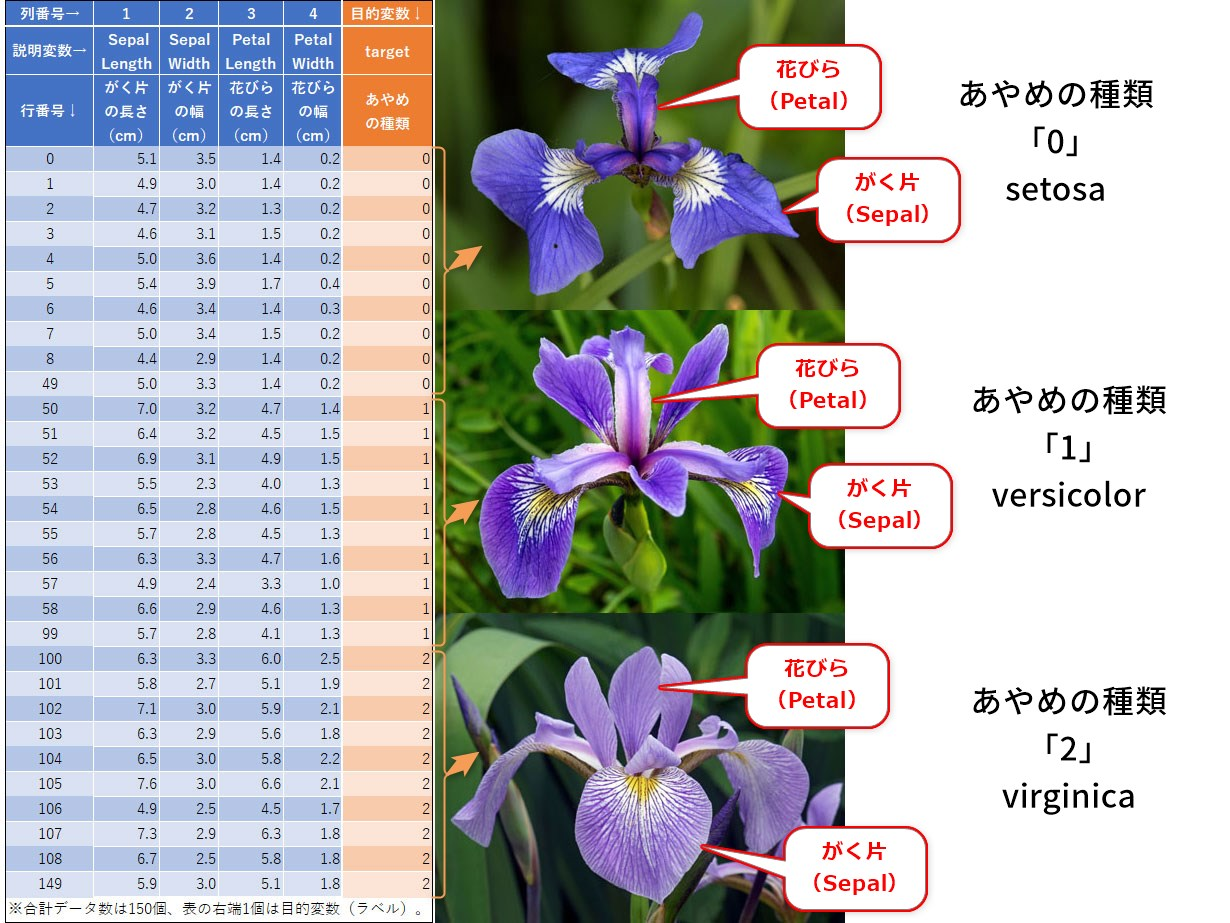

あやめの種類が三つ：

Setosa, versicolor, virginica（目的変数）

上手く見分ける**特徴**は二つ：花びらの長さ（３）と幅（４）です。

教師あり学習では、「この花はどれか」というラベルがあり、それを正しく分類するようにモデルをトレーニングします。ラベル付きなので、下に左側の絵が描けます。

一方、クラスタリングではラベルがないので、使えません。花のがくや花びらの長さ・幅といった特徴量だけから、「このデータは似ているから同じグループに属しているそうだ」というように、構造を自動的に見つけ出すのです。下に右側の絵が描けます。

つまり、「答えがわからないけれど、データの中に何らかの構造があるかも」と思われるときに、とても役に立つアプローチです。

In [ ]:
# 日本語をうまく表示できるように
!pip install japanize-matplotlib

In [ ]:
import matplotlib.pyplot as plt
import japanize_matplotlib
from sklearn.datasets import load_iris

# あやめデータセットをロードする
data = load_iris()
# 列１から４までを X に
X = data.data
# あやめの種類を y に
y = data.target

plt.figure(figsize=(12, 3.5))

# ラベル付きデータとして描く
plt.subplot(121)
plt.plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris setosa")
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")
plt.xlabel("花びらの長さ")
plt.ylabel("花びらの幅")
plt.grid()
plt.legend()

# ラベル抜きデータとして描く
plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], c="k", marker=".")
plt.xlabel("花びらの長さ")
plt.tick_params(labelleft=False)
plt.gca().set_axisbelow(True)
plt.grid()

plt.show()

### K-Means法

クラスタリングの中でも代表的な手法が、K-Means法です。K-Means法はシンプルで計算効率も良いため、実際のデータ分析でもよくつかわれます。

まずは分析したいデータを作ります。

In [ ]:
import numpy as np
from sklearn.datasets import make_blobs

# 五つのグループの分布（中央点と分散）を指定する
blob_centers = np.array([[ 0.2,  2.3], [-1.5 ,  2.3], [-2.8,  1.8],
                         [-2.8,  2.8], [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

# データのクラスターを作る
X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std,
                  random_state=7)

# データを描く関数を定義する
def plot_clusters(X, y=None):
  plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
  plt.xlabel("$x_1$")
  plt.ylabel("$x_2$", rotation=0)

# 絵を描く
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.gca().set_axisbelow(True)
plt.grid()
plt.show()

次はK-Meansを使って、このラベルなしのデータをクラスタリングします。```sklearn```を使えば、簡単にできます。まずはクラスター（分類）の数を指定しなければなりません。

```n_clusters```：クラスターの数を指定する

```n_init```は後に説明します。

In [ ]:
from sklearn.cluster import KMeans

k = 5
kmeans = KMeans(n_clusters = k, n_init = 10)
# XというデータをK-Means法によって分析する
y_pred = kmeans.fit_predict(X)

K-Means法での分析が終わったら、さまざまなものが見られます。まずはクラスタリングによる分類結果です。

In [ ]:
kmeans.labels_

```fit_predict```の関数の戻り値は同じく分類結果です。

In [ ]:
y_pred

In [ ]:
# これでも確認できる
y_pred is kmeans.labels_

K-Means法より計算された中心点も見られます。

In [ ]:
kmeans.cluster_centers_

新しいデータを先ほどトレーニングされたモデルによって、どのクラスターに属しているかを確認します。

In [ ]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

トレーニングされた分類モデルを可視化にします。

In [ ]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

# 各クラスターの中心点は白い〇に✕で描く
def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

# 各クラスターの領域を別々の色で描く
def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)

plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

K-Means法は簡単に使える手法だと分かったが、実際にどうやって計算しますか？

あらかじめ「グループの数（K）」を指定し、次のような手順でデータをグループに分けていきます：

1. K個の中心（重心）をランダムに配置する。
2. 各データ点を、「最も近い中心」に割り当てる
3. 各グループに属するデータ点の平均をとり、中心を更新する
4. 中心が動かなくなるまで、2 と 3を繰り返す

絵に描くと、わかりやすいです。

```max_iter```はこの繰り返しの回数を指定する引数です。

In [ ]:
# 一回だけ
kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1, max_iter=1,
                      random_state=41)
# 二回遂行
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1, max_iter=2,
                      random_state=41)
# 三回遂行
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1, max_iter=3,
                      random_state=41)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", rotation=0)
plt.tick_params(labelbottom=False)
plt.title("重心を更新する（初回はランダムで設定する）")

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False,
                         show_ylabels=False)
plt.title("各データポイントを領域に属する")

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False,
                         show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False,
                         show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

plt.show()

### K-Means法の初期化
K-Means法では、最初にクラスターの中心をランダムに初期化するため、同じデータを使っても毎回異なる結果になることがあります。
この初期化によって、グループの分かれ方がが大きく変わります。そして、うまく分類できない（局所最適に陥る）ことがあります。

この特性が簡単に確認できます。

```random_state```で初期化の乱数シードが指定できます。

In [ ]:
trial1 = KMeans(n_clusters = 5, init = "random", n_init = 1, random_state = 2)
trial2 = KMeans(n_clusters = 5, init = "random", n_init = 1, random_state = 15)

trial1.fit(X)
trial2.fit(X)

plt.figure(figsize=(10, 3.2))

plt.subplot(121)
plot_decision_boundaries(trial1, X)
plt.title("一回目")

plt.subplot(122)
plot_decision_boundaries(trial2, X, show_ylabels=False)
plt.title("ニ回目")
plt.show()

実は、クラスターの中心点をだいたいわかれば、```init```で指定できます。

In [ ]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1, random_state=42)
kmeans.fit(X)

plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)

結果が「どれぐらいうまく分かれたか」を測るために、慣性（inertia）という指標を使います。
* 慣性とは、各データポイントとその属するクラスターの中心との距離の2乗の合計である
* この値が小さいほど、データポイントが中心に集まっていていいクラスタリングといえる

In [ ]:
kmeans.inertia_

In [ ]:
trial1.inertia_

In [ ]:
trial2.inertia_

異なる初期化でK-Meansを何度も実行した場合、最も慣性が小さい結果を「最もよくわかられた」と考えて選ぶことができます。

そのため、実際には複数回試して最もいい結果を選ぶことがよく行われます。

``` n_init ```が回数を指定します。



In [ ]:
kmeans_10 = KMeans(n_clusters = 5, init = "random", n_init = 10)
kmeans_10.fit(X)

plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_10, X)
plt.show()

In [ ]:
kmeans_10.inertia_

### クラスタ数（K）はどう決める？

K-Means法では、あらかじめクラスタ数を決める必要があります。今まではデータが自分で作ったので、K=5が前提としてやりましたが、実際のデータでは「何個のグループが適切か」がわからないことがほとんどです。

まずは他のK値を試してみましょう。

In [ ]:
kmeans_k3 = KMeans(n_clusters=3, n_init=10, random_state=42)
kmeans_k8 = KMeans(n_clusters=8, n_init=10, random_state=42)

kmeans_k3.fit(X)
kmeans_k8.fit(X)

plt.figure(figsize=(10, 3.2))

plt.subplot(121)
plot_decision_boundaries(kmeans_k3, X)
plt.title("$k = 3$")

plt.subplot(122)
plot_decision_boundaries(kmeans_k8, X, show_ylabels=False)
plt.title("$k = 8")
plt.show()

In [ ]:
kmeans_k3.inertia_

In [ ]:
kmeans_k8.inertia_

どちらでも見るだけで良くないと分かります。では、慣性を使って適切なK値を見つけられるか？残念ながらKが大きければ大きいほど、慣性が下がります（自分で試しなさい）。

エルボー（肘）法という目安があります。

1. Kを1, 2, 3, ... と変えながらK-Meansを実行する
2. それぞれの完成の値を記録する
3. Kと慣性の関係をグラフにする
4. 肘のように曲がっている点を探す

In [ ]:
kmeans_per_k = [KMeans(n_clusters=k, n_init=10, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.annotate("", xy=(4, inertias[3]), xytext=(4.45, 650),
             arrowprops=dict(facecolor='black', shrink=0.1))
plt.text(4.5, 650, "ひじ", horizontalalignment="center")
plt.axis([1, 8.5, 0, 1300])
plt.grid()
plt.show()

今回の肘はK=4を示しています。これは、それ以上クラスターの数を増やしても改善が少なくなる境界であり、最適なKの目安になります。

In [ ]:
plot_decision_boundaries(kmeans_per_k[4 - 1], X)
plt.show()

しかしながら、こうやって左下の二つのクラスターが実際、二つのグループだったのに、一つにした場合もあります。

Silhouette法という目安もありますが、実験授業が４限と５限だけなので、飛ばします。コードは一応残して、時間あればぜひ試してみてください。

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

In [ ]:
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$")
plt.ylabel("Silhouette score")
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.grid()
plt.show()

In [ ]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)

    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = plt.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")

    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title(f"$k={k}$")

plt.show()

## 次元削減

**次元**とは何か？機械学習では、データはよく「ベクトル（数値の並び）」として表現されます。
たとえば、ポケモンの「HP」「攻撃」「防御」などのステータスがそれぞれ1つの**特徴量（feature）**となり、それらが合わさって 1体のポケモンを表すベクトルになります。

このようなベクトルが存在する空間を 特徴空間（feature space） と呼び、**特徴量の数がそのまま次元（dimension）**になります。

数学的には、「次元」は単純に別々の空間を示している表現です。例えば、僕の名前と身長は全く関係性を持っていない二つの特徴です。

* HP, 攻撃, 防御 → 3次元の特徴空間
* 画像のピクセル（例：28×28 = 784個） → 784次元の空間

### 次元の呪い
次元が高くなると（つまり、特徴が多くなる）、機械学習はさまざまな問題に直面します。これを次元の呪いと呼びます。

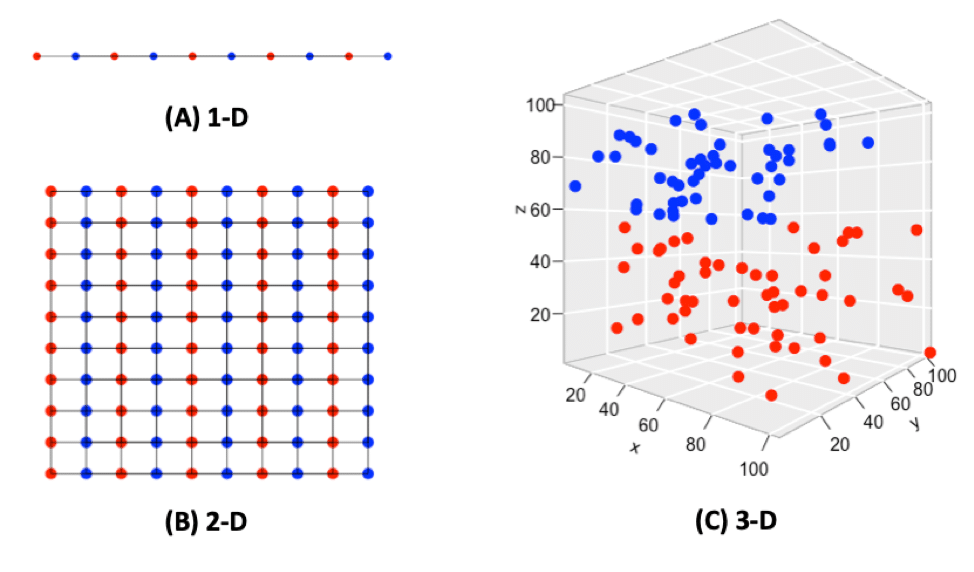

というと、様々な予想できない問題が起こします：
* データがまばらになる（密度が低くなる）
* 「距離」が意味をなさなくなる（近くも遠くも同じに見える）
* モデルが過学習しやすくなる（ノイズにも反応してしまう）

特に、クラスタリングのような「距離」に基づく手法では、高次元では正しく分類できないことがあります。

### 次元削減が必要な理由
そこで登場するのが**次元削減（dimensionality reduction）**です。次元削減には、次のような目的があります：

* データの構造を保ちながら、次元を減らす
* ノイズを除去し、重要な情報だけを抽出する
* 視覚化（人間が理解しやすくする）
* 計算の効率化と精度の向上

次元削減の代表的な手法のひとつが、これから学ぶ主成分分析（PCA: Principal Component Analysis） です。

### あやめデータセットでの分かりやすいPCA説明
まずはあやめデータセットを表します。

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# あやめデータセットをロードする
data = load_iris()
# 列１から４までを X に
X = data.data
# あやめの種類を y に
y = data.target

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
scatter = ax.scatter(X[:, 2], X[:, 3], c=y, cmap='Dark2')
plt.xlabel("花びらの長さ")
plt.ylabel("花びらの幅")
plt.grid()
plt.show()

**PCA**は、データの情報をできるだけ失わずに、次元を圧縮する手法です。
たとえば、あやめデータセットにある花びらの長さと幅の特徴量を考えましょう。
この二つの特徴は強く相関しているため、実際にはほぼ一直線に並んでいるような分布になります。

このとき PCA は、以下のように働きます：

1. データの中心を(0,0)にして、標準化する
2. データの分布をもっともよく表す**方向（＝主成分）**を見つける
3. すべてのデータ点を、その方向に直線的に投影する（= 1次元化）

つまり、2次元の情報を1つの軸に圧縮しながら、最も重要な変動（ばらつき）を保ったままデータを簡潔に表現できるのです。

あやめデータセットを例にして、1と2を見ましょう。主成分の方は赤線で描きます。

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X_wl = X[:, 2:]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(X_wl)
pca = PCA(n_components=1)
reduced_data = pca.fit_transform(scaled_data)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
scatter = ax.scatter(scaled_data[:, 0], scaled_data[:, 1], c=y, cmap='Dark2')
plt.axline((0, 0), (pca.components_[0][0], pca.components_[0][1]), color='red')
plt.xlabel("花びらの長さ")
plt.ylabel("花びらの幅")
plt.grid()
plt.show()

3の手順が終わったら、以下のようになります。

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(reduced_data, np.zeros(len(reduced_data)), c=y, cmap='Dark2')
ax.set_xlabel("主成分")
plt.tick_params(labelleft=False)
plt.gca().set_axisbelow(True)
plt.grid()

これでクラスタリングは以前より簡単にできます。

三次元から二次元の次元削減は以下の通りです。

In [ ]:
from scipy.spatial.transform import Rotation

m = 60
X = np.zeros((m, 3))  # initialize 3D dataset
np.random.seed(42)
angles = (np.random.rand(m) ** 3 + 0.5) * 2 * np.pi  # uneven distribution
X[:, 0], X[:, 1] = np.cos(angles), np.sin(angles) * 0.5  # oval
X += 0.28 * np.random.randn(m, 3)  # add more noise
X = Rotation.from_rotvec([np.pi / 29, -np.pi / 20, np.pi / 4]).apply(X)
X += [0.2, 0, 0.2]  # shift a bit

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)  # dataset reduced to 2D
X3D_inv = pca.inverse_transform(X2D)  # 3D position of the projected samples
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)

axes = [-1.4, 1.4, -1.4, 1.4, -1.1, 1.1]
x1, x2 = np.meshgrid(np.linspace(axes[0], axes[1], 10),
                     np.linspace(axes[2], axes[3], 10))
w1, w2 = np.linalg.solve(Vt[:2, :2], Vt[:2, 2])  # projection plane coefs
z = w1 * (x1 - pca.mean_[0]) + w2 * (x2 - pca.mean_[1]) - pca.mean_[2]  # plane
X3D_above = X[X[:, 2] >= X3D_inv[:, 2]]  # samples above plane
X3D_below = X[X[:, 2] < X3D_inv[:, 2]]  # samples below plane

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111, projection="3d")

# plot samples and projection lines below plane first
ax.plot(X3D_below[:, 0], X3D_below[:, 1], X3D_below[:, 2], "ro", alpha=0.3)
for i in range(m):
    if X[i, 2] < X3D_inv[i, 2]:
        ax.plot([X[i][0], X3D_inv[i][0]],
                [X[i][1], X3D_inv[i][1]],
                [X[i][2], X3D_inv[i][2]], ":", color="#F88")

ax.plot_surface(x1, x2, z, alpha=0.1, color="b")  # projection plane
ax.plot(X3D_inv[:, 0], X3D_inv[:, 1], X3D_inv[:, 2], "b+")  # projected samples
ax.plot(X3D_inv[:, 0], X3D_inv[:, 1], X3D_inv[:, 2], "b.")

# now plot projection lines and samples above plane
for i in range(m):
    if X[i, 2] >= X3D_inv[i, 2]:
        ax.plot([X[i][0], X3D_inv[i][0]],
                [X[i][1], X3D_inv[i][1]],
                [X[i][2], X3D_inv[i][2]], "r--")

ax.plot(X3D_above[:, 0], X3D_above[:, 1], X3D_above[:, 2], "ro")

def set_xyz_axes(ax, axes):
    ax.xaxis.set_rotate_label(False)
    ax.yaxis.set_rotate_label(False)
    ax.zaxis.set_rotate_label(False)
    ax.set_xlabel("$x_1$", labelpad=8, rotation=0)
    ax.set_ylabel("$x_2$", labelpad=8, rotation=0)
    ax.set_zlabel("$x_3$", labelpad=8, rotation=0)
    ax.set_xlim(axes[0:2])
    ax.set_ylim(axes[2:4])
    ax.set_zlim(axes[4:6])

set_xyz_axes(ax, axes)
ax.set_zticks([-1, -0.5, 0, 0.5, 1])

plt.show()

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, aspect='equal')
ax.plot(X2D[:, 0], X2D[:, 1], "b+")
ax.plot(X2D[:, 0], X2D[:, 1], "b.")
ax.plot([0], [0], "bo")
ax.arrow(0, 0, 1, 0, head_width=0.05, length_includes_head=True,
         head_length=0.1, fc='b', ec='b', linewidth=4)
ax.arrow(0, 0, 0, 1, head_width=0.05, length_includes_head=True,
         head_length=0.1, fc='b', ec='b', linewidth=1)
ax.set_xlabel("$z_1$")
ax.set_yticks([-0.5, 0, 0.5, 1])
ax.set_ylabel("$z_2$", rotation=0)
ax.set_axisbelow(True)
ax.grid(True)

### クラスタリングの前処理としてのPCA
実は、クラスタリングを行う前に PCA を使うのは、実務でもよくある一般的な手法です。
その理由は：

* 次元削減によって、ノイズや不要な情報を減らし、クラスタリングの精度が向上することがある
* 高次元のままだと、「距離」の計算が不安定になるため、PCAで安定した特徴空間を作る
* クラスタリング結果を 2次元や3次元に可視化できるようになる

特に K-means のように「距離」に敏感なアルゴリズムでは、PCA によってより意味のあるクラスタが得られる可能性があります。

# 演習課題：ポケモンデータセットでクラスタリングしてみよう！

ここまでの内容をふまえて、今度は Kaggle で公開されているポケモンのデータセットを使って、自分でクラスタリングを行ってみましょう！

## データセットのダウンロード先

Download data from here:
https://www.kaggle.com/datasets/mariotormo/complete-pokemon-dataset-updated-090420/


## やってみよう
1. csv を読み込む
2. 使用する特徴量（例：HP, Attack, Defense, Speed, など）を選ぶ
3. データを正規化する（StandardScaler を使おう）
4. K-means でクラスタリングを実行（k=3 などから試してみよう）
5. PCA を使ってクラスタリング結果を 3次元に可視化

実際の「タイプ（Type1）」と比較して、どんなグループ分けになったかを考察！


この下のコードは参考です。

In [ ]:
import pandas as pd

pokemon = pd.read_csv("/content/pokedex_(Update_04.21).csv")
from google.colab import data_table
data_table.DataTable(pokemon)

In [ ]:
import seaborn as sns
pokemon.groupby('generation').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))

In [ ]:
from sklearn.preprocessing import StandardScaler

features = ['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']
data = pokemon[features].dropna()

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [ ]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(scaled_data)

pokemon['cluster'] = labels

In [ ]:
pca = PCA(n_components=3)
reduced_data = pca.fit_transform(scaled_data)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(reduced_data[:, 0], reduced_data[:, 1], reduced_data[:, 2], c=pokemon['cluster'], cmap='Dark2')
plt.title('PCA of Pokemon Data')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.colorbar(scatter)
plt.show()